In [1]:
import numpy as np
import pandas as pd


In [2]:
#np arrays
random = np.random.randint(low = 0, high =100, size = 1000)
name = np.random.choice([1, 2, 3, 4, 5],size =  1000)
choice = np.random.choice([10,11,13,12,14],size = 1000)
y1 = np.random.choice([1,1],size = 900)
y2 = np.random.choice([0,0],size = 100)
y = np.concatenate((y1, y2))

#creating dictionary
dict1 = {
    'Random':random, 
    'Name':name,
    'Choice':choice,
    'Y': y
}

#creating dataframe
df = pd.DataFrame(dict1)
df

,Random,Name,Choice,Y
0,98,4,14,1
1,47,2,12,1
2,10,4,13,1
3,82,3,10,1
4,17,5,14,1
...,...,...,...,...
995,28,2,12,0
996,69,5,10,0
997,99,2,13,0
998,13,3,11,0


In [3]:
x = df['Y'].value_counts()

# printing the values
print(x)

1    900
0    100
Name: Y, dtype: int64


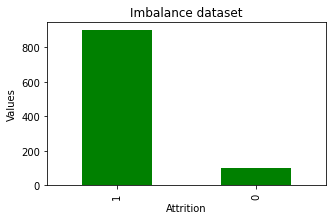

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 3)
x.plot(kind = 'bar', color ='green')

plt.title('Imbalance dataset', fontsize = 12)
plt.xlabel('Attrition')
plt.ylabel('Values')
plt.show()

### Separating majority and minority classes

In [5]:
from sklearn.utils import resample

#separating majority and minority classes
df_majority = df[df.Y == 1]
df_minority = df[df.Y == 0]

### Downsampling majority class

In [6]:
#Upsampling minority class

df_majority_downsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=100,    # to match minority class
                                 random_state=111) 

#combining majority classes with upsampled minority class

df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [7]:
df_downsampled.shape

(200, 4)

### Upsampling minority class

In [8]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=900,    # to match majority class
                                 random_state=123) 

#combining majority classes with upsampled minority class

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [9]:
df_upsampled.shape

(1800, 4)

## SMOTE :Synthetic Minority Oversampling Technique

In [10]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
X_train = df.iloc[:,0:3]
y_train = df.iloc[:,3:]

In [13]:
sm = SMOTE(random_state=2)

X_smote,y_smote=sm.fit_sample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
X_train.shape, y_train.shape

((1000, 3), (1000, 1))

In [16]:
X_smote.shape , y_smote.shape

((1800, 3), (1800,))